## Setup

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import numpy as np
import srs

# Load the datasets
def load_data():
    import os
    
    # Find all CSV files in the datasets folders
    csv_files = []
    for root, dirs, files in os.walk("datasets"):
        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))

    # Load the CSV files as numpy matrices
    datasets = {}
    for file in csv_files:
        matrix = np.genfromtxt(file, delimiter=",")
        file_name = os.path.basename(file).split('.')[0]
        datasets[file_name] = matrix

    return datasets

datasets = load_data()

## Definição dos Experimentos

In [62]:
from tqdm import tqdm

def experiment(solver, name, datasets, X_size=2):
    global NUM_EXPERIMENTS_PER_CONFIG
    global POPULATIONS
    global GENERATIONS

    X_train = datasets[name + '-train'][:, :-1]
    y_train = datasets[name + '-train'][:, -1]

    X_test = datasets[name + '-test'][:, :-1]
    y_test = datasets[name + '-test'][:, -1]

    for psize in POPULATIONS:
        for gsize in GENERATIONS:
            #if gsize == 500 and psize == 500:
            #    continue
            print("Running ", name)
            for it in tqdm(range(NUM_EXPERIMENTS_PER_CONFIG)):
                experiment_name = name+'-default-' + '-pop:' + str(psize) + '-gens:' + str(gsize) + '-it:' + str(it)
                solver.update_params(pop_size=psize, max_generations=gsize, X_size=X_size)
                solver.fit(X_train, y_train, experiment_name)
            print("")
    


In [32]:
it = 1
X_train = datasets[name + '-train'][:, :-1]
y_train = datasets[name + '-train'][:, -1]

X_test = datasets[name + '-test'][:, :-1]
y_test = datasets[name + '-test'][:, -1]

experiment_name = 'synth1'+'-default-' + '-pop:' + str(500) + '-gens:' + str(100) + '-it:' + str(it)
solver.update_params(pop_size=500, max_generations=100, X_size=2)
solver.fit(X_train, y_train, experiment_name)

Starting evolution...
Generation: 
0 
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 
 91 92 93 94 95 96 97 98 99 100 

# Experimentos

In [60]:
solver = srs.SymbolicRegressionSolver()

In [ ]:
# Experiments
NUM_EXPERIMENTS_PER_CONFIG = 10
POPULATIONS = [50, 100, 500]
GENERATIONS = [50, 100]

### Synth 1

In [61]:
name = 'synth1'
experiment(solver, name, datasets, X_size=2)

Starting evolution...
Generation: 
0 
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Starting evolution...
Generation: 
0 
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 
 91 92 93 94 95 96 97 98 99 100 Starting evolution...
Generation: 
0 
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Starting evolution...
Generation: 
0 
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 8

In [24]:
import pickle

# Object to be saved
my_object = solver.results

# Save the object to a file
with open('synth1_results.pkl', 'wb') as file:
    pickle.dump(my_object, file)

### Synth 2

In [ ]:
name = 'synth2'
experiment(solver, name, datasets, X_size=2)

### Concrete

In [ ]:
name = 'concrete'
experiment(solver, name, datasets, X_size=8)

## Plotting

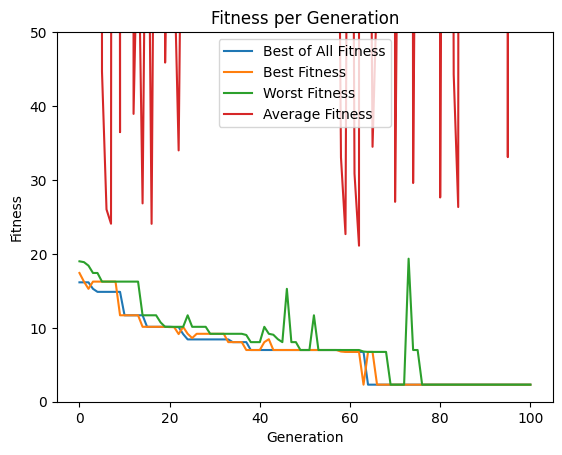

In [30]:
# Data per generation
best_experiment = solver.get_best_experiment('synth1-default')

best_fitness = solver.get_best_param_per_generation('best_all_fitness', best_experiment)
best_curr_fitness = solver.get_best_param_per_generation('best_curr_fitness', best_experiment)
worst_fitness = solver.get_best_param_per_generation('worst_curr_fitness', best_experiment)
avg_fitness = solver.get_best_param_per_generation('avg', best_experiment)

# Plotting th Best (green), Worst (red) and Average (blue) fitness per generation with labels
# But cap it at fitness=100
import matplotlib.pyplot as plt

plt.plot(best_fitness, label='Best of All Fitness')
plt.plot(best_curr_fitness, label='Best Fitness')
plt.plot(worst_fitness, label='Worst Fitness')
plt.plot(avg_fitness, label='Average Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness per Generation')

# max y value is 100
axes = plt.gca()
axes.set_ylim([0,50])

plt.legend()
plt.show()

In [44]:
for resul in solver.results:
    if resul[0] == 'synth1-default--pop:500-gens:100-it:0':
        comp0 = resul[1]
    elif resul[0] == 'synth1-default--pop:500-gens:100-it:1':
        comp1 = resul[1]

In [45]:
comp0[-1]['best_all_fitness']

2.3073731515145184

In [46]:
comp1[-1]['best_all_fitness']

5.973946161510726

In [48]:
best_experiment2 = 'synth1-default--pop:500-gens:100-it:1'

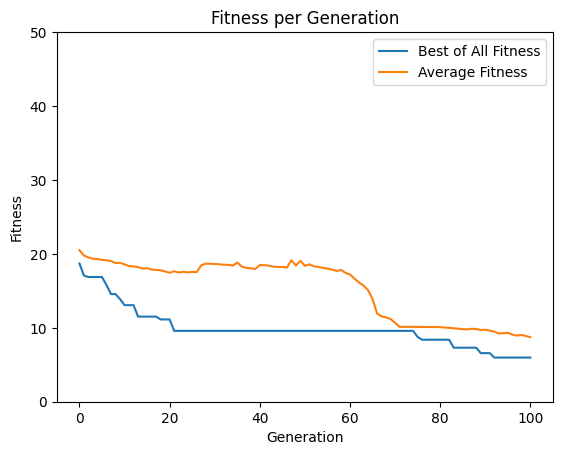

In [55]:
# Data per generation

best_fitness = solver.get_best_param_per_generation('best_all_fitness', best_experiment2)
best_curr_fitness = solver.get_best_param_per_generation('best_curr_fitness', best_experiment2)
worst_fitness = solver.get_best_param_per_generation('worst_curr_fitness', best_experiment2)
avg_fitness = solver.get_best_param_per_generation('bests_avg', best_experiment2)

# Calculate Moving Average
window_size = 10
moving_avg = np.convolve(avg_fitness, np.ones(window_size), 'valid') / window_size


# Plotting th Best (green), Worst (red) and Average (blue) fitness per generation with labels
# But cap it at fitness=100
import matplotlib.pyplot as plt

plt.plot(best_fitness, label='Best of All Fitness')
#plt.plot(best_curr_fitness, label='Best Fitness')
#plt.plot(worst_fitness, label='Worst Fitness')
plt.plot(avg_fitness, label='Average Fitness')
#plt.plot(moving_avg, label='Moving Average')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness per Generation')

# max y value is 100
axes = plt.gca()
axes.set_ylim([0,50])

plt.legend()
plt.show()